

1.   arrendondar as casas decimais certo (init)
2.   funções com valores não definidos $tg(\pi /2)$
3.   Definir multiplicação e divisão



In [ ]:
!pip install git+https://github.com/brenopelegrin/LabIFSC.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/brenopelegrin/LabIFSC.git to /tmp/pip-req-build-ml3caovu
  Running command git clone --filter=blob:none --quiet https://github.com/brenopelegrin/LabIFSC.git /tmp/pip-req-build-ml3caovu
  Resolved https://github.com/brenopelegrin/LabIFSC.git to commit 595de75b033806265ae6f2b0e4f386148f73ad7f
  Preparing metadata (setup.py) ... done
  Created wheel for LabIFSC: filename=LabIFSC-0.1.13-py3-none-any.whl size=21281 sha256=9633556884e544e4ed1a32149fb16a8a8205382d9b906fbb751db7776fca6b3e
  Stored in directory: /tmp/pip-ephem-wheel-cache-97mnpdr9/wheels/6d/ea/fa/e7a1855acf40a6fe305152eea67e6bc7e6bd763c2202f19dfd
Successfully built LabIFSC


In [69]:
from LabIFSC import*

import numpy as np
from numpy.random import normal
from scipy.stats import skew
a=Medida((10,2),"m")
b=Medida((20,4),"m")

def skewness(valores,desviopadrao,media):#usado para medir o quanto uma distribuição é assimétrica (ou quanto ela foge de uma gaussiana)
  m3=0
  for j in valores:
    m3+=(j-media)**3
  m3=m3/len(valores)
  g1=m3/(desviopadrao**(1.5))
  return g1
def montecarlo(funcao,N,*lista):
  ##parametros adicionais
  matplot="no"
  numpy="no"
  for j in lista:
    if type(j)=="str":
      print("e")
      if j in ["hist","graph","matplot","print"] :
        print("hey")
        matplot="yes"
        lista.remove(j)
      elif j in ["numpy","np"]:
        numpy="yes"
        lista.remove(j)
      else: 
        lista.remove(j)
  N=int(N)
  samples=[]
  for j in range(len(lista)): samples.append(normal(lista[j].nominal,lista[j].incerteza,N))
  values=[]
  for k in range(N):
    temp=[]
    for j in range(len(lista)):
      temp+=[samples[j][k]]
    values.append(funcao(tuple(temp)))
  if matplot=="yes":
    try: 
      from matplotlib.pyplot import hist
      hist(values,100)
    except: raise Exception("You need to install matplotlib to show the histogram")
  if numpy=="yes":
    from numpy import average,std
    media=np.average(values)
    desviopadrao=np.std(values)
  else:
    media=sum(values)/len(values)
    desviopadrao=0
    for j in lista:
      desviopadrao+=(media-j)**2
    desviopadrao=(desviopadrao/len(values))**(1/2)
  skew=skewness(values,desviopadrao,media)
  return Medida((media,desviopadrao),"m")
def soma(x): return x[0]/x[1]
c=montecarlo(soma,1e6,a,b,"matplot")
print(c)


        

AttributeError: ignored

average 0.9999993085222422 std 0.0014153710648880007 skewness -0.009770024726222331


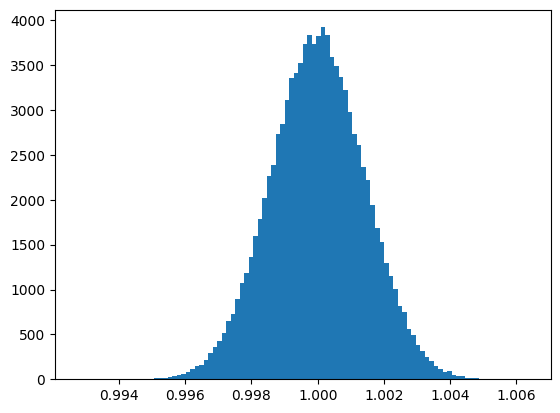

In [ ]:

def onda(v):
  A=v[0]
  omega=v[1]
  phi=v[2]
  t=v[3]
  return A*np.cos(omega*t+phi)
def dividindo(v):
  return v[0]/v[1]
